# Assignment 3 #

A fan is rotating with a constant angular velocity, $\omega_o=2\pi(R+2)$ radians/s, where R is the last digit of your roll number. You are measuring the angle of the fan, $\theta(t)=\omega_ot$ ; $\theta(t) ∈ [0,2\pi)$, with respect to time t, sampled at a frequency Fs=128Hz for a duration of 1s.

The last digit of my roll number is R=1
thus $\omega_o$=2$\pi$ * 3 radians/s

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def generate_theta(omega,n):

    theta=(omega*n)%(2*np.pi)
    return theta,n



In [12]:
def setlimit(i):
    if i==0:
        plt.ylim(-5,10)
    elif i==1:
        plt.ylim(-5,10)
    else:
        plt.ylim(-10,15)

In [13]:
def plot_theta(theta,x):

    plt.title(r"Actual $\theta[n]$ plot ")
    plt.xlabel('Values of n')
    plt.ylabel(r"$\theta(n)$")
    plt.plot(x,theta,'-o')
    plt.show()

In [14]:
def generate_train_sample(omega,n):
  
    
    np.random.seed(3)
    np.random.shuffle(n)

    
    nts=n[0:10]                       #nts is train set
    nts.sort()
    

    thta,n=generate_theta(omega,nts)      #train_sets
    return thta,n


In [15]:
def generate_test_samples(omega,n,nts):
    
    
    nt=np.setdiff1d(n,nts)
    
    nst=nt[0:90]
    nst.sort()
    
    test,ntest=generate_theta(omega,nst)
    return test,ntest

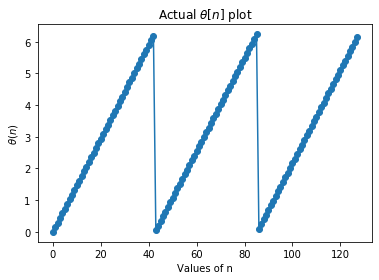

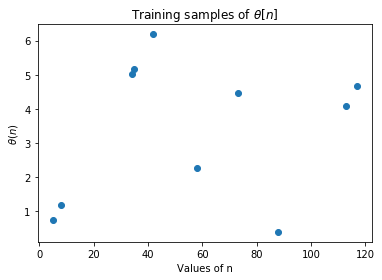

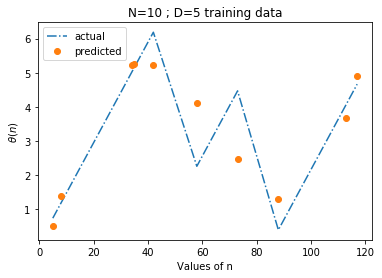

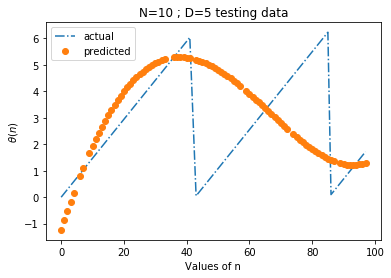

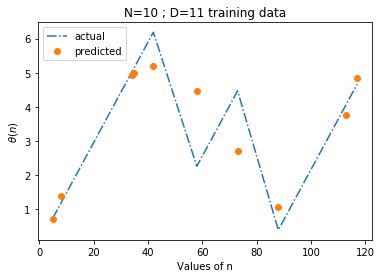

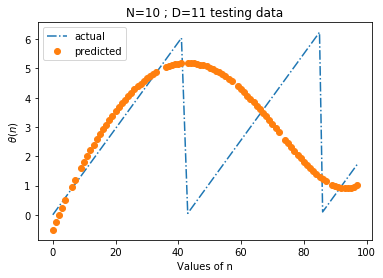

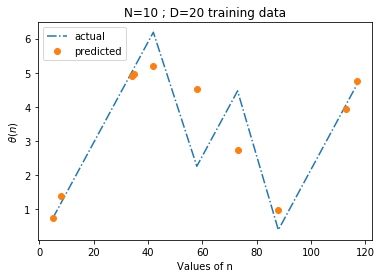

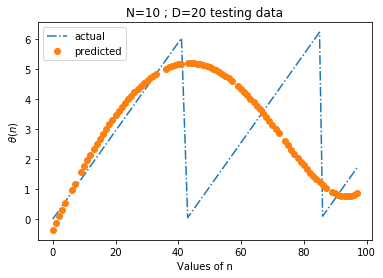

In [18]:
omega=2*np.pi*3
Fs=128
Ts=1/Fs
n=np.arange(Fs)
sample=n*Ts
x=np.arange(Fs)
theta,n=generate_theta(omega,sample)
plot_theta(theta,x)


trainsample,ntrain=generate_train_sample(omega,n)
plt.title(r"Training samples of $\theta[n]$ ")
plt.xlabel('Values of n')
plt.ylabel(r"$\theta(n)$")
plt.plot(ntrain*Fs,trainsample,'o')
plt.show()

testsample,ntest=generate_test_samples(omega,sample,ntrain)


m=[5,11,20]
for i in range(3):
    M=np.arange(m[i]+1)
    N=len(M)
    NTR=np.reshape(ntrain,(len(ntrain),1))
    trains=np.reshape(trainsample,(len(trainsample),1))
    phi=np.power(NTR,M)
    w=np.random.rand(N,1)*(2000/N)
    kross=1
   
    while kross>0:
        grad=2*np.dot(phi.T,(trains-np.dot(phi,w)))
        w=w+0.06*grad
        kross=len(grad)
        for j in range(len(grad)):
            if abs(grad[j])<0.01:
                kross=kross-1
        
                
    
    ytrain=np.dot(phi,w)
    NTST=np.reshape(ntest,(len(ntest),1))
    phitest=np.power((NTST),M)
    ytest=np.dot(phitest,w)
    
    
    plt.title('N=10 ; D=%d training data'%(N-1))
    plt.xlabel('Values of n')
    plt.ylabel(r"$\theta(n)$")
    plt.plot(ntrain*Fs,trainsample,'-.',label='actual')
    plt.plot(ntrain*Fs,ytrain,'o',label='predicted')
    plt.legend(loc='upper left')
    plt.show()
    
    plt.title('N=10 ; D=%d testing data'%(N-1))
    plt.xlabel('Values of n')
    plt.ylabel(r"$\theta(n)$")
    plt.plot(ntest*Fs,testsample,'-.',label='actual')
    plt.plot(ntest*Fs,ytest,'o',label='predicted')
    plt.legend(loc='upper left')
    plt.show()
    